In [402]:
#import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import tweepy as tw
from tweepy import OAuthHandler
from tweepy.errors import HTTPException
from tweepy.errors import TweepyException
import requests as rq
import json
from json import JSONDecodeError
import re
from wordcloud import WordCloud
from textwrap import wrap
from timeit import default_timer as timer
%matplotlib inline

##  Gather

In [403]:
#load the twitter archive dataset
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [404]:
#Download the image prediction file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

In [405]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [406]:
df_image = pd.read_csv('image-predictions.tsv', sep ='\t')

In [407]:
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

In [408]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [409]:
tweet_ids= []
for ids in tweets['tweet_id']:
    tweet_ids.append(ids)

In [410]:
def data_gathering(data):
    a=[]
    with open(data,"r")as r:
        for line in r:
            t = json.loads(line)
            a.append(t)
    b=[]
    for i in a:
        b.append({"tweet_id":i['id'],
                 "retweet_count":i['retweet_count'],
                 "favorite_count":i['favorite_count'],
                 "retweeted":i['retweeted']})
    return pd.DataFrame(b)

In [411]:
tweet = data_gathering('tweet_json.txt')

##  Assess

In [412]:
def data_information(tweets):
    
    first_five_rows= tweets.head()
    
    dataframe_size = tweets.shape
    
    data_description = tweets.info()
    
    data_statistics = tweets.describe()
    
    columns = tweets.columns
    
    list_of_columns = list(tweets.columns.values.tolist())
    
    duplicate_data = tweets.duplicated().sum
    
    null_data = tweets.isnull().any().any()

    return first_five_rows, dataframe_size, data_description, data_statistics, columns, list_of_columns, duplicate_data, null_data

twitter_details = data_information(tweets)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [413]:
twitter_details[0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [414]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [415]:
tweets.text[5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [416]:
# Drop the clolumns with the very low values
twitter_details[1]

(2356, 17)

In [417]:
twitter_details [3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [418]:
twitter_details[5]

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [419]:
twitter_details[6]

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool>

In [420]:
twitter_details[7]

True

In [421]:
def image_details(df_image):
    
    
    first_three_rows= df_image.head(3)

    image_data_size = df_image.shape
    
    image_description = df_image.info()
    
    image_data_statistics = df_image.describe()
    
    image_columns = df_image.columns
    
    list_of_columns = list(df_image.columns.values.tolist())
    
    duplicate_image = df_image.duplicated().sum
    
    null_image_data = df_image.isnull().any().any()

    return first_three_rows, image_data_size , image_description, image_data_statistics, image_columns, list_of_columns, duplicate_image, null_image_data

image_data = image_details(df_image)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [422]:
image_data[0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [423]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [424]:
image_data[1]

(2075, 12)

In [425]:
image_data[3]

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [426]:
image_data[4]

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [427]:
image_data[6]

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool>

In [428]:
image_data[7]

False

In [429]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [430]:
df_image['img_num'].nunique

<bound method IndexOpsMixin.nunique of 0       1
1       1
2       1
3       1
4       1
       ..
2070    2
2071    1
2072    1
2073    1
2074    1
Name: img_num, Length: 2075, dtype: int64>

In [431]:
def real_twitter_details(tweet):
    
    
    first_three_rows= tweet.head(3)

    data_size = tweet.shape
    
    tweet_description = tweet.info()
    
    tweet_statistics = tweet.describe()
    
    tweet_columns = tweet.columns
    
    list_of_columns = list(tweet.columns.values.tolist())
    
    duplicate_tweet=tweet.duplicated().sum
    
    null_tweet = tweet.isnull().any().any()

    return first_three_rows, data_size , tweet_description, tweet_statistics, tweet_columns, list_of_columns, duplicate_tweet, null_tweet

tweet_data = real_twitter_details(tweet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
 3   retweeted       2327 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 56.9 KB


In [432]:
tweet_data[0]

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,6976,33701,False
1,892177421306343426,5280,29231,False
2,891815181378084864,3466,21972,False


In [433]:
tweet_data[1]

(2327, 4)

In [434]:
tweet_data[3]

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2460.501074,7027.513107
std,6.820795e+16,4167.087429,10918.990892
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1221.000000
50%,7.178418e+17,1146.000000,3039.000000
75%,7.986547e+17,2846.000000,8566.500000
max,8.924206e+17,70400.000000,144275.000000


In [435]:
tweet_data[4]

Index(['tweet_id', 'retweet_count', 'favorite_count', 'retweeted'], dtype='object')

In [436]:
tweet_data[5]

['tweet_id', 'retweet_count', 'favorite_count', 'retweeted']

In [437]:
tweet_data[6]

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2322    False
2323    False
2324    False
2325    False
2326    False
Length: 2327, dtype: bool>

In [438]:
tweet_data[7]

False

### Quality

#### Twitter_archive table

- Presence of null values in some columns
- Inconsistency in the dog names 
- Presence of urls in text column
- Timestamp column is in object datatype instead of datetime
- Presence of outliers in the rating numerator column
- Presence of outliers on the rating denominator column


#### Image_prediction table

- Presence of images that are not dogs
- Some attributes(columns) need to be remaned

### Tidiness

#### Twitter_archive table

- Dog stages (Doggo, floofer, pupper and puppo) are spread across columns

#### Image Prediction table
- Predictions are scattered across columns

##  Data Cleaning 

In [439]:
# Copying the tables in order to commence cleaning

clean_tweets = tweets.copy()
df_image_clean = df_image.copy()
tweet_clean = tweet.copy()

### Define

Drop the columns with many null values and other columns that are not relevant to the analysis using drop()

### Code

In [440]:
clean_tweets.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis =1, inplace = True)

### Test

In [532]:
assert clean_tweets.isnull().any().any() == False, "there ia null"

> The timestamp in object datatype and not timestamp

### Define

> Convert the timestamp column into datetime using pd.to_Datetime()

### Code

In [443]:
clean_tweets['timestamp'] = pd.to_datetime(clean_tweets['timestamp'])

### Test

In [444]:
clean_tweets['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

Presence of outliers in both rating_numerator and rating_denominator columns

### Define

> Check the proportion of rating_numerators and rating_denominators that are out of line. Visual assessment of the table reveals that bulk of the values ranges between 10-20. 

In [445]:
len(clean_tweets[clean_tweets['rating_numerator']>10])

1455

In [446]:
clean_tweets['rating_numerator'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64>

In [447]:
clean_tweets= clean_tweets[~((clean_tweets['rating_denominator'] > 10)  | (clean_tweets['rating_denominator'] < 10))]

In [448]:
clean_tweets

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


In [449]:
clean_tweets = clean_tweets[~(clean_tweets['rating_denominator'] > 20)]

In [450]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2333 non-null   int64              
 1   timestamp           2333 non-null   datetime64[ns, UTC]
 2   source              2333 non-null   object             
 3   text                2333 non-null   object             
 4   rating_numerator    2333 non-null   int64              
 5   rating_denominator  2333 non-null   int64              
 6   name                2333 non-null   object             
 7   doggo               2333 non-null   object             
 8   floofer             2333 non-null   object             
 9   pupper              2333 non-null   object             
 10  puppo               2333 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 218.7+ KB


In [451]:
#extracting the url away from the text
clean_tweets['text']=clean_tweets['text'].apply(lambda x:x.lower())
clean_tweets['text']=clean_tweets['text'].apply(lambda x:re.sub(r'https://t.co/[a-zA-Z0-9]*$','',x))
clean_tweets['text']=clean_tweets['text'].apply(lambda x:re.sub(r'\s+https://t.co/[a-zA-Z0-9]*\s','',x))
clean_tweets['text']=clean_tweets['text'].apply(lambda x:re.sub(r'https://t.co/[a-zA-Z0-9]*$','',x))
clean_tweets['text']=clean_tweets['text'].apply(lambda x:re.sub(r'[^A-Za-z]+',' ',x))

In [452]:
clean_tweets['text'][2]

'this is archie he is a rare norwegian pouncing corgo lives in the tall grass you never know when one may strike '

In [453]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2333 non-null   int64              
 1   timestamp           2333 non-null   datetime64[ns, UTC]
 2   source              2333 non-null   object             
 3   text                2333 non-null   object             
 4   rating_numerator    2333 non-null   int64              
 5   rating_denominator  2333 non-null   int64              
 6   name                2333 non-null   object             
 7   doggo               2333 non-null   object             
 8   floofer             2333 non-null   object             
 9   pupper              2333 non-null   object             
 10  puppo               2333 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 283.3+ KB


In [454]:
clean_tweets = pd.melt(clean_tweets, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name'], value_vars =['doggo', 'floofer', 'pupper', 'puppo'])

In [455]:
clean_tweets.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,variable,value
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas he s a mystical boy only ever ...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is tilly she s just checking pup on you h...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is archie he is a rare norwegian pouncing...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is darla she commenced a snooze mid meal ...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is franklin he would like you to stop cal...,12,10,Franklin,doggo,None


In [456]:
clean_tweets.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,variable,value
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas he s a mystical boy only ever ...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is tilly she s just checking pup on you h...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is archie he is a rare norwegian pouncing...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is darla she commenced a snooze mid meal ...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is franklin he would like you to stop cal...,12,10,Franklin,doggo,None


In [457]:
#Drop the melted columns since most values contain none and will not give insights to the analysis
clean_tweets.drop(['variable', 'value'],  axis = 1, inplace = True)

In [458]:
clean_tweets.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is phineas he s a mystical boy only ever ...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is tilly she s just checking pup on you h...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is archie he is a rare norwegian pouncing...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is darla she commenced a snooze mid meal ...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is franklin he would like you to stop cal...,12,10,Franklin


In [459]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [460]:
#putting all the predictions into one column
image = pd.melt(df_image, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_dog'], value_vars =['p1_conf', 'p2_conf', 'p3_conf'])

In [461]:
image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_dog,variable,value
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,p1_conf,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,p1_conf,0.506826


In [462]:
#Renaming the columns
image = image.rename(columns = {'p1':'breed', 'p1_dog':'dog_prediction', 'variable':'predicted_type', 'value':'confidence_level'})

In [463]:
image

,tweet_id,jpg_url,img_num,breed,dog_prediction,predicted_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,p1_conf,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,p1_conf,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,p1_conf,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,p1_conf,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,p1_conf,0.560311
...,...,...,...,...,...,...,...
6220,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,p3_conf,0.175219
6221,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,p3_conf,0.040836
6222,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,p3_conf,0.031379
6223,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,p3_conf,0.068957


In [464]:
#Drop the observations that are not dogs

image = image[~(image['dog_prediction'] == False)]

image.head()

,tweet_id,jpg_url,img_num,breed,dog_prediction,predicted_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,p1_conf,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,p1_conf,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,p1_conf,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,p1_conf,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,p1_conf,0.560311


In [465]:
#Drop the columns that are not necessary for the analysis

image.drop(['dog_prediction', 'predicted_type', 'img_num'],  axis = 1, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [466]:
image

,tweet_id,jpg_url,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
...,...,...,...,...
6218,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.193548
6219,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.076902
6220,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.175219
6222,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.031379


In [467]:
# Also drop the breeds whose confidence level is 0.46 and below

image = image[~(image['confidence_level'] <= 0.48)]

In [468]:
image

,tweet_id,jpg_url,breed,confidence_level
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
...,...,...,...,...
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [469]:
image['tweet_id'].duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 1       False
2       False
4       False
5       False
7       False
        ...  
2065    False
2066    False
2067    False
2070    False
2072    False
Name: tweet_id, Length: 1000, dtype: bool>

In [470]:
len(image[image['tweet_id'].duplicated()])

0

In [471]:
#merge all the three dataframes together
merged_df = pd.merge(image, tweet, how = 'inner', on = 'tweet_id')

In [472]:
merged_df

,tweet_id,jpg_url,breed,confidence_level,retweet_count,favorite_count,retweeted
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,39,112,False
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,36,100,False
2,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,36,88,False
3,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,50,115,False
4,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,196,367,False
...,...,...,...,...,...,...,...
984,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,6075,27846,False
985,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,3605,24436,False
986,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,15693,56636,False
987,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,7723,35166,False


In [473]:
main_df = pd.merge (merged_df, clean_tweets, how = 'inner', on = 'tweet_id')

In [474]:
main_df

,tweet_id,jpg_url,breed,confidence_level,retweet_count,favorite_count,retweeted,timestamp,source,text,rating_numerator,rating_denominator,name
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,39,112,False,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is a western brown mitsubishi terrier ups...,7,10,a
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,39,112,False,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is a western brown mitsubishi terrier ups...,7,10,a
2,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,39,112,False,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is a western brown mitsubishi terrier ups...,7,10,a
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,39,112,False,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is a western brown mitsubishi terrier ups...,7,10,a
4,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,36,100,False,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",here is a very happy pup big fan of well maint...,9,10,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,7723,35166,False,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is franklin he would like you to stop cal...,12,10,Franklin
3912,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3466,21972,False,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is archie he is a rare norwegian pouncing...,12,10,Archie
3913,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3466,21972,False,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is archie he is a rare norwegian pouncing...,12,10,Archie
3914,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3466,21972,False,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is archie he is a rare norwegian pouncing...,12,10,Archie


In [475]:
len(main_df[main_df['tweet_id'].duplicated()])

2937

In [476]:
main_df.drop_duplicates(inplace = True)

In [477]:
#calculate the overall rating by dividing the rating numerator by the rating denominator
main_df['dog_rating'] = main_df['rating_numerator']// main_df['rating_denominator']

In [478]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 3912
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            979 non-null    int64              
 1   jpg_url             979 non-null    object             
 2   breed               979 non-null    object             
 3   confidence_level    979 non-null    float64            
 4   retweet_count       979 non-null    int64              
 5   favorite_count      979 non-null    int64              
 6   retweeted           979 non-null    bool               
 7   timestamp           979 non-null    datetime64[ns, UTC]
 8   source              979 non-null    object             
 9   text                979 non-null    object             
 10  rating_numerator    979 non-null    int64              
 11  rating_denominator  979 non-null    int64              
 12  name                979 non-null   

In [503]:
#making sure that all ratings are original and unique, that is no retweets.
main_df['retweeted'].unique()

array([False])

In [480]:
#store the dataframe in a csv file
main_df.to_csv('twitter_archive_master.csv', index = False)

##  Exploratory Data Analysis

> These analyses set to answer the following questions

- Is there a relationship between the retweet_count and the favourite_count (likes) and the dog rating
- What dog breed is mostly liked and retweeted
- Which dog breed is highest rating?
- Is there any relationship between the confidence level and the dog rating? Will people rate the images they are sure of? 

In [505]:
master_data = pd.read_csv('twitter_archive_master.csv')

In [507]:
master_data.head(2)

,tweet_id,jpg_url,breed,confidence_level,retweet_count,favorite_count,retweeted,timestamp,source,text,rating_numerator,rating_denominator,name,dog_rating
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,39,112,False,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",this is a western brown mitsubishi terrier ups...,7,10,a,0
1,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,36,100,False,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",here is a very happy pup big fan of well maint...,9,10,a,0


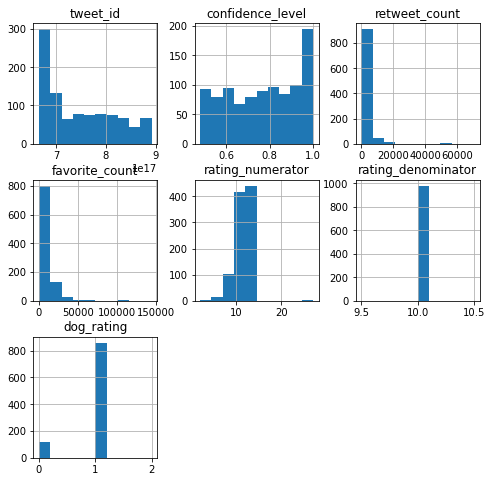

In [508]:
#showing the shape and trends in the distribution of the data
master_data.hist(figsize = (8, 8));

In [509]:
#showing the disparity of some values

def my_boxplot(a):
    
    return sns.boxplot(x=master_data[a]);

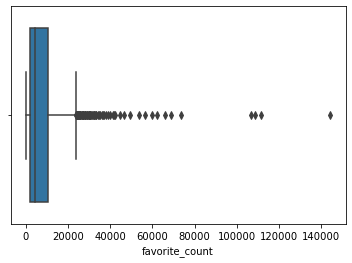

In [511]:
my_boxplot('favorite_count');

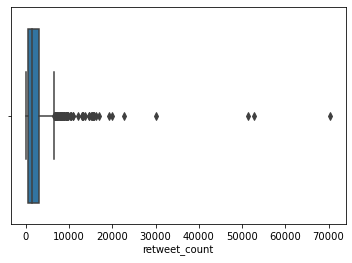

In [513]:
my_boxplot('retweet_count');

In [514]:
#checking for correlation between variables
master_data2 = master_data[['confidence_level', 'retweet_count', 'favorite_count','dog_rating']].corr()

In [515]:
master_data2

,confidence_level,retweet_count,favorite_count,dog_rating
confidence_level,1.000000,-0.020910,-0.000935,0.017750
retweet_count,-0.020910,1.000000,0.872604,0.153912
favorite_count,-0.000935,0.872604,1.000000,0.186153
dog_rating,0.017750,0.153912,0.186153,1.000000


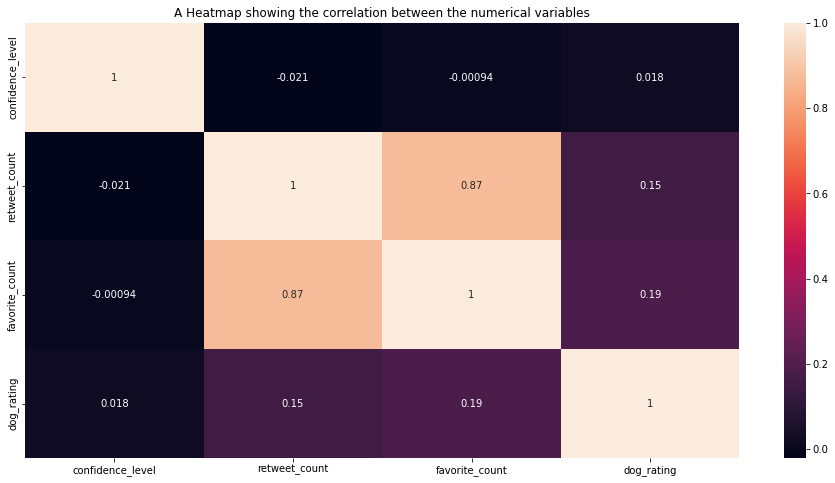

In [516]:
plt.figure(figsize=(16,8))
plt.title('A Heatmap showing the correlation between the numerical variables')
sns.heatmap(master_data2, annot = True);

> The above heatmap shows the correlation between variables on each axis in a square. The correlation ranges from -1 to 1. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/light cream because those squares are correlating each variable to itself (that is, it's a perfect correlation). The larger the number and lighter the color and the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares. This means that there is a positive relationship between the likes, rewteet count and dog rating. The more the likes and retweets a dog gets, the more it is being rated.

In [517]:
#creating a table showing the breed, rate count and average rating
df1=master_data.groupby(['breed']).agg(rate_count=('breed','count'),Mean_rating=('dog_rating',np.mean)).sort_values(by='rate_count', ascending=False)[:10]
df1.reset_index(inplace=True)

In [518]:
df1

,breed,rate_count,Mean_rating
0,golden_retriever,125,0.960000
1,Pembroke,71,0.971831
2,Labrador_retriever,65,0.923077
3,Chihuahua,49,0.795918
4,pug,46,0.739130
5,Samoyed,31,1.000000
6,Pomeranian,30,1.000000
7,chow,27,1.000000
8,toy_poodle,25,0.920000
9,French_bulldog,21,0.761905


In [519]:
def my_plots(a, b):
    return sns.barplot(data =df1, x = a, y = b);

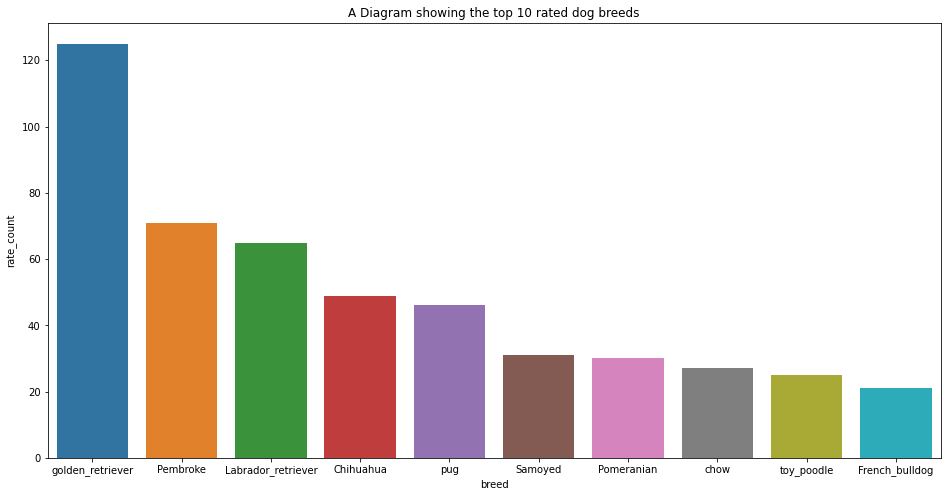

In [520]:
#creating a bar chart showing the most rated breeds
plt.figure(figsize=(16,8))
plt.title("A Diagram showing the top 10 rated dog breeds")
my_plots('breed', 'rate_count');

In [521]:
#creating a table for the mostly retweeted dogs
retweeted_dogs = master_data.groupby(['breed']).agg(Retweets = ('retweet_count','count'), Average_retweets = ('retweet_count', np.mean)).sort_values(by = 'Average_retweets', ascending = False)[:10]
#Resetting the index
retweeted_dogs = retweeted_dogs.reset_index()

In [522]:
retweeted_dogs


,breed,Retweets,Average_retweets
0,Eskimo_dog,10,6933.100000
1,Great_Pyrenees,9,5058.000000
2,Tibetan_mastiff,4,5025.250000
3,Irish_water_spaniel,1,4847.000000
4,Irish_setter,3,4656.666667
5,Cardigan,14,4655.071429
6,Afghan_hound,1,4228.000000
7,French_bulldog,21,4145.904762
8,Saluki,4,4117.000000
9,Labrador_retriever,65,3958.015385


In [523]:
#creating a table for the most liked dogs
liked_dogs = master_data.groupby(['breed']).agg(Likes = ('favorite_count','count'), Average_likes = ('favorite_count', np.mean)).sort_values(by = 'Average_likes', ascending = False)[:10]
#Resetting the index
liked_dogs = liked_dogs.reset_index()

In [524]:
liked_dogs

,breed,Likes,Average_likes
0,Irish_water_spaniel,1,21579.000000
1,Saluki,4,20727.750000
2,Eskimo_dog,10,18252.900000
3,French_bulldog,21,16612.571429
4,Afghan_hound,1,14720.000000
5,black-and-tan_coonhound,2,14614.500000
6,Great_Pyrenees,9,14422.666667
7,Chesapeake_Bay_retriever,13,12822.307692
8,Leonberg,3,12614.666667
9,basset,9,12468.777778


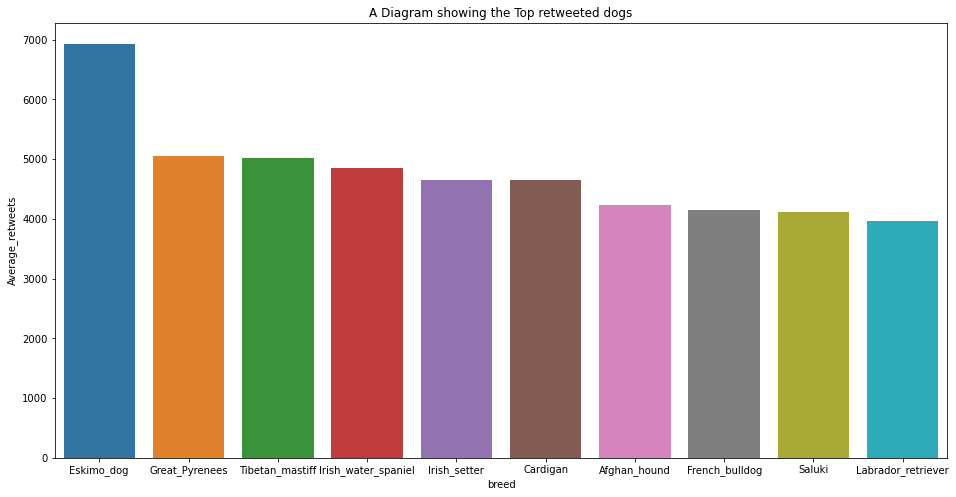

In [525]:
#showing the mostly retweeted breeds
plt.figure(figsize = (16,8))
plt.title('A Diagram showing the Top retweeted dogs')
sns.barplot(data = retweeted_dogs, x = 'breed', y = 'Average_retweets');

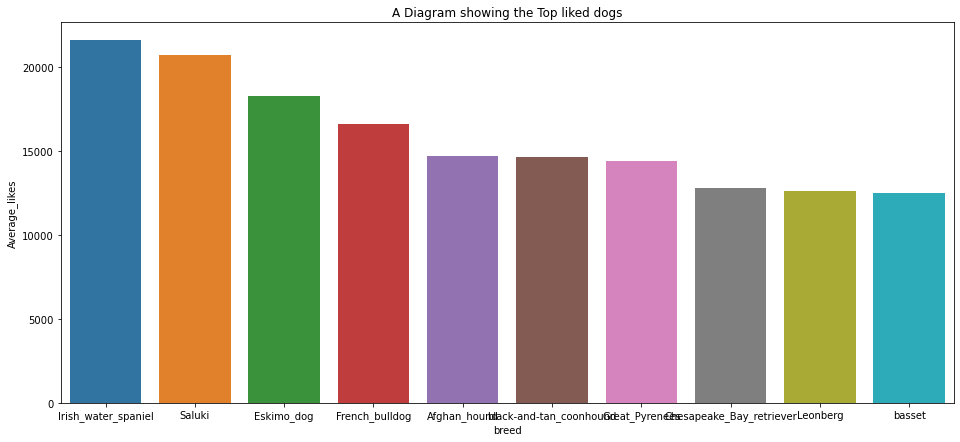

In [526]:
#creating a bar chart with shows the mostly liked dogs
plt.figure(figsize = (16,7))
plt.title('A Diagram showing the Top liked dogs')
sns.barplot(data = liked_dogs, x = 'breed', y = 'Average_likes');

In [527]:
def my_reg_plots(c,d):
    return sns.regplot(data = master_data, x = c, y=d);

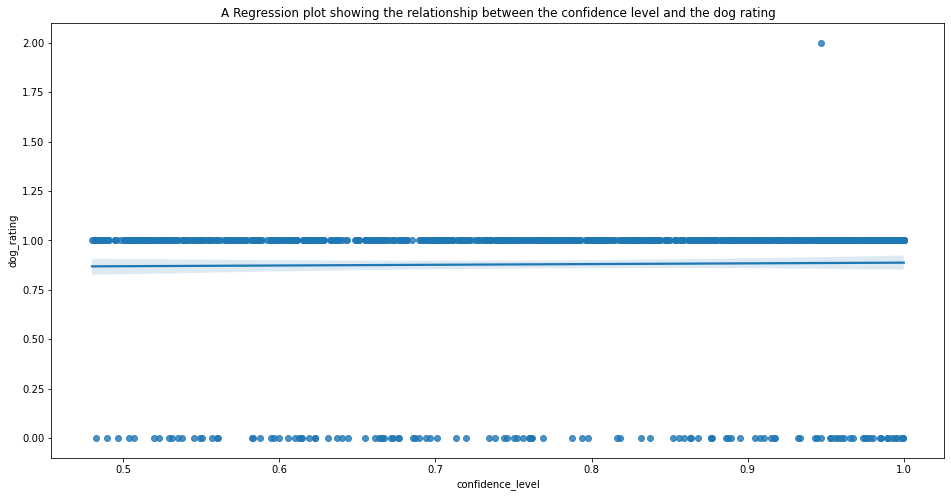

In [528]:
plt.figure(figsize = (16, 8))
plt.title('A Regression plot showing the relationship between the confidence level and the dog rating')
my_reg_plots('confidence_level', 'dog_rating');

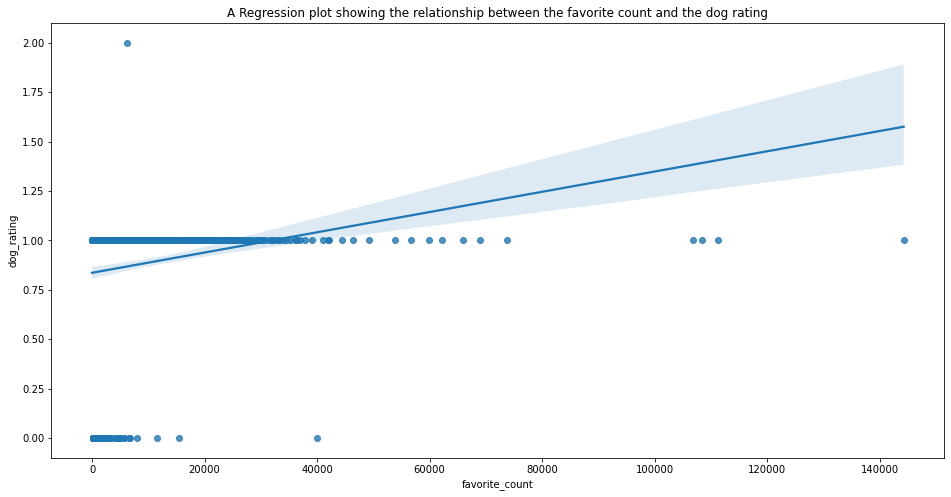

In [529]:
#showing the relationship between the favorite count and dog rating
plt.figure(figsize = (16, 8))
plt.title('A Regression plot showing the relationship between the favorite count and the dog rating')
my_reg_plots('favorite_count', 'dog_rating');

In [530]:
master_data['text']=master_data['text'].apply(lambda x:' '.join([t for t in x.split() if len(t)>=3]))

comment_word=' '.join([text for text in master_data['text']])

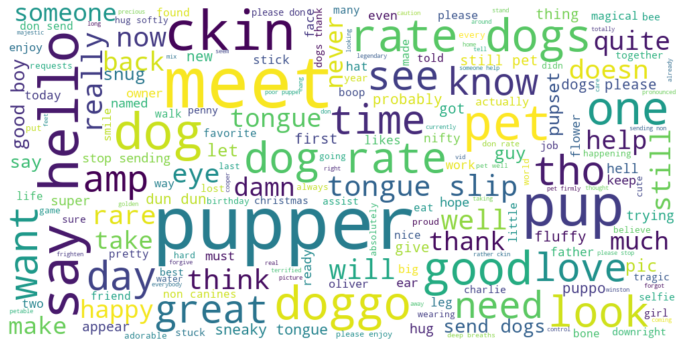

In [531]:
#chart showing the most frequently used word in all tweet text
wordcloud = WordCloud(width=1000, height=500, background_color = 'white', random_state=21, max_font_size=110).generate(comment_word)
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');